In [1]:
import os
import pandas as pd

# .csv 파일만을 대상으로 합니다.
csv_files = [file for file in os.listdir() if file.endswith('.csv')]

# # 각 CSV 파일에 대해
# for filename in csv_files:
#     # 파일명을 '_'를 기준으로 분리합니다.
#     parts = filename.split('_')
#     # 테이블명과 확장자만을 사용해 새 파일명을 생성합니다.
#     new_filename = parts[0] + '.csv'
#     # 파일명을 변경합니다. 현재 파일명과 새 파일명이 같지 않은 경우에만 변경합니다.
#     if filename != new_filename:
#         os.rename(filename, new_filename)

In [2]:
csv_files

['SOITDSPOTINTSOPERHSTR.csv',
 'SOITDTODCNFG.csv',
 'SOITDWKLYPLAN.csv',
 'SOITSINTSSGNLCNFGINFO.csv',
 'SOITSINTSSGNLCNFGINFOTMDIFF.csv',
 'SOITSPHASINFO.csv',
 'SOITSPHASINFOTMDIFF.csv',
 'SOITSRGNPRTTNINFO.csv',
 'SOITSSMLNFLFMTHSTR.csv',
 'SOITSSPOTINTSTMDIFF.csv']

In [3]:
names = [f for f in os.listdir() if f.endswith('.csv')]

dfs = []
for csv_file in names:
    table_name = csv_file.split('.')[0]
    dfs.append(pd.read_csv(csv_file))

pd.set_option("display.max_columns", None)
pd.set_option('display.min_rows', 20)
pd.reset_option('display.min_rows')

print(len(names))
# for i in range(len(names)):
#     print(names[i])
#     display(dfs[i])

10


In [4]:
# 신호교차로운영이력 #1124606개 행 41개 열 # related to history
print(names[0])
display(dfs[0].head())
print(dfs[0].CTRL_SE_CD.unique()) # 제어구분코드
print(dfs[0].CTRL_STTS_CD.unique()) # 제어상태코드
print((dfs[0]['CYCL_HR'] >= dfs[0]['OFST_HR']).sum())
display(dfs[0][dfs[0]['CYCL_HR']<dfs[0]['OFST_HR']].head())
dfs[0]['A_sum'] = sum(dfs[0][f'A_RING_{i}_PHAS_HR'] for i in range(1, 9)) 
dfs[0]['B_sum'] = sum(dfs[0][f'A_RING_{i}_PHAS_HR'] for i in range(1, 9)) 
consistent = (dfs[0]['A_sum'] == dfs[0]['B_sum']) & (dfs[0]['B_sum'] == dfs[0]['CYCL_HR'])
dfs[0][~consistent].head()
print(dfs[0].SPOT_INTS_ID.nunique())
print(len(dfs[0].columns))

SOITDSPOTINTSOPERHSTR.csv


SPOT_INTS_ID  CLCT_UNIX_TM   CLCT_DT  CTRL_SE_CD  CTRL_STTS_CD  CYCL_HR  \
0          5341    1701759845  20231205           3             1      120   
1          5343    1701759844  20231205           3             1      149   
2          5345    1701759843  20231205           3             1      141   
3          5372    1701759845  20231205           3             1      150   
4          6008    1701759845  20231205           3             1      150   

   OFST_HR  A_RING_1_PHAS_HR  A_RING_2_PHAS_HR  A_RING_3_PHAS_HR  \
0        5                21                39                21   
1       93                31               118                 0   
2       23                21                32                18   
3       95                26               102                22   
4       95                38                24                44   

   A_RING_4_PHAS_HR  A_RING_5_PHAS_HR  A_RING_6_PHAS_HR  A_RING_7_PHAS_HR  \
0                39                 0                 0                 0   
1                 0                 0                 0                 0   
2                21                31                18                 0   
3                 0                 0                 0                 0   
4                44                 0                 0                 0   

   A_RING_8_PHAS_HR  B_RING_1_PHAS_HR  B_RING_2_PHAS_HR  B_RING_3_PHAS_HR  \
0                 0                21                39                21   
1                 0                31               118                 0   
2                 0                21                32                18   
3                 0                26               102                22   
4                 0                38                24                68   

   B_RING_4_PHAS_HR  B_RING_5_PHAS_HR  B_RING_6_PHAS_HR  B_RING_7_PHAS_HR  \
0                39                 0                 0                 0   
1                 0                 0                 0                 0   
2                21                31                18                 0   
3                 0                 0                 0                 0   
4                20                 0                 0                 0   

   B_RING_8_PHAS_HR  A_RING_1_PHAS_AMBL_HR  A_RING_2_PHAS_AMBL_HR  \
0                 0                      0                      0   
1                 0                      0                      0   
2                 0                      0                      0   
3                 0                      0                      0   
4                 0                     34                      0   

   A_RING_3_PHAS_AMBL_HR  A_RING_4_PHAS_AMBL_HR  A_RING_5_PHAS_AMBL_HR  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                     37                      0                      0   

   A_RING_6_PHAS_AMBL_HR  A_RING_7_PHAS_AMBL_HR  A_RING_8_PHAS_AMBL_HR  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   B_RING_1_PHAS_AMBL_HR  B_RING_2_PHAS_AMBL_HR  B_RING_3_PHAS_AMBL_HR  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                     34                      0              

[3 0 2]
[1 3 2 0]
298922


SPOT_INTS_ID  CLCT_UNIX_TM   CLCT_DT  CTRL_SE_CD  CTRL_STTS_CD  CYCL_HR  \
113           8342    1701759852  20231205           3             1        0   
114           8343    1701759851  20231205           3             1        0   
748           8340    1701759881  20231205           3             1        0   
749           8345    1701759881  20231205           3             1        0   
1602          3160    1701759926  20231205           3             2      122   

      OFST_HR  A_RING_1_PHAS_HR  A_RING_2_PHAS_HR  A_RING_3_PHAS_HR  \
113        72                 0                 0                 0   
114        71                 0                 0                 0   
748        41                 0                 0                 0   
749        41                 0                 0                 0   
1602      124                34                88                 0   

      A_RING_4_PHAS_HR  A_RING_5_PHAS_HR  A_RING_6_PHAS_HR  A_RING_7_PHAS_HR  \
113                  0                 0                 0                 0   
114                  0                 0                 0                 0   
748                  0                 0                 0                 0   
749                  0                 0                 0                 0   
1602                 0                 0                 0                 0   

      A_RING_8_PHAS_HR  B_RING_1_PHAS_HR  B_RING_2_PHAS_HR  B_RING_3_PHAS_HR  \
113                  0                 0                 0                 0   
114                  0                 0                 0                 0   
748                  0                 0                 0                 0   
749                  0                 0                 0                 0   
1602                 0                34                88                 0   

      B_RING_4_PHAS_HR  B_RING_5_PHAS_HR  B_RING_6_PHAS_HR  B_RING_7_PHAS_HR  \
113                  0                 0                 0                 0   
114                  0                 0                 0                 0   
748                  0                 0                 0                 0   
749                  0                 0                 0                 0   
1602                 0                 0                 0                 0   

      B_RING_8_PHAS_HR  A_RING_1_PHAS_AMBL_HR  A_RING_2_PHAS_AMBL_HR  \
113                  0                      0                      0   
114                  0                      0                      0   
748                  0                      0                      0   
749                  0                      0                      0   
1602                 0                      0                      0   

      A_RING_3_PHAS_AMBL_HR  A_RING_4_PHAS_AMBL_HR  A_RING_5_PHAS_AMBL_HR  \
113                       0                      0                      0   
114                       0                      0                      0   
748                       0                      0                      0   
749                       0                      0                      0   
1602                      0                      0                      0   

      A_RING_6_PHAS_AMBL_HR  A_RING_7_PHAS_AMBL_HR  A_RING_8_PHAS_AMBL_HR  \
113                       0                      0                      0   
114                       0                      0                      0   
748                       0                      0                      0   
749                       0                      0                      0   
1602                      0                      0                      0   

      B_RING_1_PHAS_AMBL_HR  B_RING_2_PHAS_AMBL_HR  B_RING_3_PHAS_AMBL_HR  \
113                       0                      0                      0   
114                       0                      0                      0   
748                       0                      0         

2896
41


In [5]:
# TOD 구성 # 492640개 행 25개 열 # related to todplan
print(names[1])
display(dfs[1].sort_values(by=['SPOT_INTS_ID', 'CLCT_UNIX_TM', 'TM_PLAN_NO', 'PHAS_OPER_PLAN_NO']))
print(dfs[1].TM_PLAN_NO.unique())
# print(dfs[1].TM_PLAN_NO.value_counts())
print(dfs[1].PHAS_OPER_PLAN_NO.unique())
print(dfs[1].BGNG_HH.unique())
print(dfs[1].BGNG_MI.unique())
print(dfs[1].CYCL_HR.unique())
print(dfs[1].SPOT_INTS_ID.nunique())

SOITDTODCNFG.csv


SPOT_INTS_ID  CLCT_UNIX_TM   CLCT_DT  TM_PLAN_NO  PHAS_OPER_PLAN_NO  \
1120          1001    1701702017  20231205           1                  1   
1121          1001    1701702017  20231205           1                  2   
1122          1001    1701702017  20231205           1                  3   
1123          1001    1701702017  20231205           1                  4   
1124          1001    1701702017  20231205           1                  5   
...            ...           ...       ...         ...                ...   
4            14806    1701753355  20231205          10                 12   
3            14806    1701753355  20231205          10                 13   
2            14806    1701753355  20231205          10                 14   
1            14806    1701753355  20231205          10                 15   
0            14806    1701753355  20231205          10                 16   

      BGNG_HH  BGNG_MI  CYCL_HR  OFST_HR  A_RING_1_PHAS_HR  A_RING_2_PHAS_HR  \
1120        6        0      160       45                63                45   
1121        7        0      170       50                70                45   
1122        9       30      170       50                70                45   
1123       13        0      170       50                70                45   
1124       16        0      160       35                63                45   
...       ...      ...      ...      ...               ...               ...   
4           0        0        0        0                 0                 0   
3           0        0        0        0                 0                 0   
2           0        0        0        0                 0                 0   
1           0        0        0        0                 0                 0   
0           0        0        0        0                 0                 0   

      A_RING_3_PHAS_HR  A_RING_4_PHAS_HR  A_RING_5_PHAS_HR  A_RING_6_PHAS_HR  \
1120                52                 0                 0                 0   
1121                55                 0                 0                 0   
1122                55                 0                 0                 0   
1123                55                 0                 0                 0   
1124                52                 0                 0                 0   
...                ...               ...               ...               ...   
4                    0                 0                 0                 0   
3                    0                 0                 0                 0   
2                    0                 0                 0                 0   
1                    0                 0                 0                 0   
0                    0                 0                 0                 0   

      A_RING_7_PHAS_HR  A_RING_8_PHAS_HR  B_RING_1_PHAS_HR  B_RING_2_PHAS_HR  \
1120                 0                 0                63                45   
1121                 0                 0                70                45   
1122                 0                 0                70                45   
1123                 0                 0                70                45   
1124                 0                 0                63                45   
...                ...               ...               ...               ...   
4                    0                 0                 0                 0   
3                    0                 0                 0                 0   
2                    0                 0                 0                 0   
1                    0                 0                 0                 0   
0                    0                 0                 0                 0   

      B_RING_3_PHAS_HR  B_RING_4_PHAS_HR  B_RING_5_PHAS_HR  B_RING_6_PHAS_HR  \
1120                52                 0                 0                 0   
1121                55                

[10  9  8  7  6  5  4  3  2  1]
[16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
[ 0 23 21 19 17  9  7  6  5 22  8 20 16 11 13 10 18 12]
[ 0 30]
[  0 110 120 130 140 150 160 170 100 180 190  80  85  90 200  95]
58


In [6]:
# 주간시각제어 # related to weeklyplan
print(names[2])
pd.set_option('display.min_rows', 20)
display(dfs[2])
dfs[2].SPOT_INTS_ID.value_counts().max()
dfs[2].SPOT_INTS_ID.nunique()

SOITDWKLYPLAN.csv


SPOT_INTS_ID  CLCT_UNIX_TM   CLCT_DT  SUN_TM_PLAN_NO  MON_TM_PLAN_NO  \
0             6277    1701702017  20231205               4               2   
1             6276    1701702017  20231205               4               2   
2             6275    1701702017  20231205               4               2   
3             6274    1701702017  20231205               4               2   
4             6273    1701702017  20231205               4               2   
5             6272    1701702017  20231205               4               2   
6             6271    1701702017  20231205               4               2   
7             5462    1701702017  20231205               4               2   
8             5461    1701702017  20231205               4               2   
9             5460    1701702017  20231205               0               0   
...            ...           ...       ...             ...             ...   
3062          1023    1701702017  20231205               4               2   
3063          1022    1701702017  20231205               4               2   
3064          1021    1701702017  20231205               4               2   
3065          1020    1701702017  20231205               4               2   
3066          1019    1701702017  20231205               4               2   
3067          1018    1701702017  20231205               4               2   
3068          1017    1701702017  20231205               4               2   
3069          1016    1701702017  20231205               4               2   
3070          1015    1701702017  20231205               4               2   
3071          1014    1701702017  20231205               4               2   

      TUE_TM_PLAN_NO  WED_TM_PLAN_NO  THU_TM_PLAN_NO  FRI_TM_PLAN_NO  \
0                  1               1               1               1   
1                  1               1               1               1   
2                  1               1               1               1   
3                  1               1               1               1   
4                  1               1               1               1   
5                  1               1               1               1   
6                  1               1               1               1   
7                  1               1               1               1   
8                  1               1               1               1   
9                  0               0               0               0   
...              ...             ...             ...             ...   
3062               1               1               1               1   
3063               1               1               1               1   
3064               1               1               1               1   
3065               1               1               1               1   
3066               1               1               1               1   
3067               1               1               1               1   
3068               1               1               1               1   
3069               1               1               1               1   
3070               1               1               1               1   
3071               1               1               1               1   

      SAT_TM_PLAN_NO  SUN_HR_PLAN_NO  MON_HR_PLAN_NO  TUE_HR_PLAN_NO  \
0                  3               1               1               1   
1                  3               1               1               1   
2                  3               1               1               1   
3                  3               1               1               1   
4                  3               1               1               1   
5                  3               1               1               1   
6                  3               1               1               1   
7                  3               1               1               1   
8                  3               1               1    

3072

In [7]:
# 교차로 신호구성정보 테이블
pd.set_option('display.min_rows', 8)
print(names[3])
display(dfs[3])

SOITSINTSSGNLCNFGINFO.csv


CRSW_1_EDGE_ID  CRSW_1_GREN_HR   CRSW_2_EDGE_ID  CRSW_2_GREN_HR  \
0                NaN             NaN              NaN             NaN   
1       476749048_01            20.0  476748603_02_01            20.0   
2       476749048_01            20.0  476748603_02_01            20.0   
3       476748607_02            39.0  476746944_02_01            39.0   
...              ...             ...              ...             ...   
14319            NaN             NaN              NaN             NaN   
14320   476745566_02            46.0     476758740_02            46.0   
14321   476745566_02            46.0     476758740_02            46.0   
14322            NaN             NaN              NaN             NaN   

        CRSW_3_EDGE_ID  CRSW_3_GREN_HR   CRSW_4_EDGE_ID  CRSW_4_GREN_HR  \
0                  NaN             NaN              NaN             NaN   
1         476748604_01            20.0              NaN             NaN   
2         476748604_01            20.0              NaN             NaN   
3                  NaN             NaN              NaN             NaN   
...                ...             ...              ...             ...   
14319              NaN             NaN              NaN             NaN   
14320  476761314_01_02            46.0  476746529_02_01            46.0   
14321  476761314_01_02            46.0  476746529_02_01            46.0   
14322              NaN             NaN              NaN             NaN   

      CRSW_5_EDGE_ID  CRSW_5_GREN_HR     ENTR_EDGE_ID  ENTR_MVMT_CD  \
0                NaN             NaN     476745566_02             2   
1                NaN             NaN  476746944_02_01             8   
2                NaN             NaN  476746944_02_01             3   
3                NaN             NaN  476748603_02_01             6   
...              ...             ...              ...           ...   
14319            NaN             NaN  476746529_02_01             3   
14320            NaN             NaN              NaN            17   
14321            NaN             NaN              NaN            17   
14322            NaN             NaN     476745566_02             5   

          EXIT_EDGE_ID  EXIT_MVMT_CD  INTS_GROP_ID  INTS_LAT  INTS_LOT  \
0      476761314_01_01           6.0            51       NaN       NaN   
1         476748607_01           4.0            62       NaN       NaN   
2         476749046_01           2.0            62       NaN       NaN   
3         476749046_01           2.0            62       NaN       NaN   
...                ...           ...           ...       ...       ...   
14319     476745566_01           2.0            51       NaN       NaN   
14320              NaN          17.0            51       NaN       NaN   
14321              NaN          17.0            51       NaN       NaN   
14322     476758740_01           4.0            51       NaN       NaN   

       INTS_NM  INTS_SE_CD  MAJR_INTS_SE_CD  MAJR_ROAD_SE_CD  MIN_GREN_HR  \
0      서운초교4거리           2                1               10         16.0   
1       새벌로4거리           2                1               10         20.0   
2       새벌로4거리           2                1               10         20.0   
3       새벌로4거리           2                1               20         42.0   
...        ...         ...              ...              ...          ...   
14319  서운초교4거리           2                1               10         16.0   
14320  서운초교4거리           2                1               10         46.0   
14321  서운초교4거리           2                1               10         46.0   
14322  서운초교4거리           2                1               10         16.0   

                     NODE_ID  PBADMS_DSTT_CD  PHAS_CTRL_CD  PHAS_NO  RED_HR  \
0                     191984           23070             1        5       1   
1      cluster_192187_192191           23070             1        1       0   
2      cluster_192187_192191           23070             1      

In [8]:
# 교차로 신호구성정보(시차제) 테이블
print(names[4])
display(dfs[4])

SOITSINTSSGNLCNFGINFOTMDIFF.csv


CRSW_1_EDGE_ID  CRSW_1_GREN_HR CRSW_2_EDGE_ID  CRSW_2_GREN_HR  \
0       476634372_02            33.0            NaN             NaN   
1       476634372_02            33.0            NaN             NaN   
2    476601951_01_02            20.0            NaN             NaN   
3    476601951_01_02            20.0            NaN             NaN   
..               ...             ...            ...             ...   
126     476710955_01            27.0            NaN             NaN   
127     476710955_01            27.0            NaN             NaN   
128              NaN             NaN            NaN             NaN   
129              NaN             NaN            NaN             NaN   

    CRSW_3_EDGE_ID  CRSW_3_GREN_HR  CRSW_4_EDGE_ID  CRSW_4_GREN_HR  \
0              NaN             NaN             NaN             NaN   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
..             ...             ...             ...             ...   
126            NaN             NaN             NaN             NaN   
127            NaN             NaN             NaN             NaN   
128            NaN             NaN             NaN             NaN   
129            NaN             NaN             NaN             NaN   

     CRSW_5_EDGE_ID  CRSW_5_GREN_HR       ENTR_EDGE_ID  ENTR_MVMT_CD  \
0               NaN             NaN    476601951_01_02             5   
1               NaN             NaN                NaN            17   
2               NaN             NaN       476634372_02             8   
3               NaN             NaN       476601948_02             4   
..              ...             ...                ...           ...   
126             NaN             NaN                NaN            17   
127             NaN             NaN                NaN            17   
128             NaN             NaN       476710955_01             6   
129             NaN             NaN  476750406_0202_01             2   

          EXIT_EDGE_ID  EXIT_MVMT_CD  INTS_GROP_ID  INTS_LAT  INTS_LOT  \
0         476601948_01             4            99       NaN       NaN   
1                  NaN            17            99       NaN       NaN   
2         476601948_01             4            99       NaN       NaN   
3         476634372_01             8            99       NaN       NaN   
..                 ...           ...           ...       ...       ...   
126                NaN            17            53       NaN       NaN   
127                NaN            17            53       NaN       NaN   
128  476750406_0202_02             2            53       NaN       NaN   
129       476710955_02             6            53       NaN       NaN   

     INTS_NM  INTS_SE_CD  MAJR_INTS_SE_CD  MAJR_ROAD_SE_CD  MIN_GREN_HR  \
0    서림초교3거리           2                1               10           36   
1    서림초교3거리           2                1               10           36   
2    서림초교3거리           2                1               20           23   
3    서림초교3거리           2                1               20           23   
..       ...         ...              ...              ...          ...   
126  작전공원4거리           2                2               10           29   
127  작전공원4거리           2                2               10           29   
128  작전공원4거리           2                2               10           21   
129  작전공원4거리           2                2               10           21   

    NODE_ID  PBADMS_DSTT_CD  PHAS_CTRL_CD  PHAS_NO  RED_HR RING_SE_CD RMRK  \
0    187391           23020             2        1       3          A  시차제   
1    187391           23020             2        1       3          B  시차제   
2    187391           23020             2        2       3          A  시차제   
3    187391           23020             2        2       3          B

In [9]:
# 현시정보 테이블
print(names[5])
display(dfs[5])
print(dfs[5].SPOT_INTS_ID.nunique())

SOITSPHASINFO.csv


MAJR_INTS_SE_CD  MAJR_ROAD_SE_CD  MIN_GREN_HR  \
0                   1               10           38   
1                   1               20           42   
2                   1               10           12   
3                   1               10           26   
...               ...              ...          ...   
7029                1               10           16   
7030                1               20           33   
7031                1               10           15   
7032                1               10           52   

                                                NODE_ID  PHAS_NO  \
0                                                181661        1   
1                                                181661        2   
2                                                181661        3   
3                                                181667        1   
...                                                 ...      ...   
7029  cluster_cluster_191152_193095_cluster_192712_1...        1   
7030  cluster_cluster_191152_193095_cluster_192712_1...        2   
7031  cluster_cluster_191152_193095_cluster_192712_1...        3   
7032  cluster_cluster_191152_193095_cluster_192712_1...        4   

                 SGNL_STTS  SPOT_INTS_ID  YELW_HR  RED_HR  
0            grrrrgGgrrrgG          2025        4       2  
1            gGGGrgrgGGGgr          2025        5       3  
2            gGGGGgrgrrrgr          2025        4       3  
3                ggrrrgGGr          1016        4       1  
...                    ...           ...      ...     ...  
7029  rrrGrrrrrrrrrGrrrrrr          7011        4       1  
7030  rrrrGGGrrGrrrrGGGrrG          7011        5       0  
7031  rrrrrrrGGrrrrrrrrGGr          7011        4       2  
7032  GGGrrrrrrrGGGrrrrrrr          7011        5       0  

[7033 rows x 9 columns]

1592


In [10]:
# 현시정보(시차제) 테이블
print(names[6])
display(dfs[6])

SOITSPHASINFOTMDIFF.csv


SPOT_INTS_ID                                            NODE_ID  \
0           5128  cluster_184518_SN20220718115335D_cluster_58054...   
1           5128  cluster_184518_SN20220718115335D_cluster_58054...   
2           5128  cluster_184518_SN20220718115335D_cluster_58054...   
3           5128  cluster_184518_SN20220718115335D_cluster_58054...   
..           ...                                                ...   
60          5142                                             184342   
61          5142                                             184342   
62          5142                                             184342   
63          5128  cluster_184518_SN20220718115335D_cluster_58054...   

    MAJR_INTS_SE_CD  PHAS_NO              SGNL_STTS  MIN_GREN_HR  YELW_HR  \
0                 1        5  gGGGrrrrrrgrrrgrrrrrr           16        5   
1                 1        4  grrrrrrGGGgrrrgrrrrGG           11        5   
2                 1        3  grrrrrrGGGgrrrgrrrrGG           14        0   
3                 1        2  grrrrrrGrrgrrrgrrrGrr           34        4   
..              ...      ...                    ...          ...      ...   
60                1        3        gGGGGGggrrrrrgr           15        4   
61                1        2        gGGGGrggGGGGrgr           56        4   
62                1        1        grrrrrggrrrrrgG           34        4   
63                1        6  grrrrrrrrrgGGGgrrrrrr           22        5   

    MAJR_ROAD_SE_CD  RED_HR  
0                10       1  
1                10       0  
2                10       0  
3                20       0  
..              ...     ...  
60               10       0  
61               20       1  
62               10       1  
63               10       3  

[64 rows x 9 columns]

In [11]:
# 지역분할정보 테이블
print(names[7])
display(dfs[7])
print(dfs[7].SPOT_INTS_ID.nunique())
districts = dfs[7].RGN_PRTTN_NM.unique()
print(districts)

SOITSRGNPRTTNINFO.csv


NODE_ID  OGDP_SE_CD  \
0                                               191219           1   
1                                               187521           1   
2                                               188012           1   
3                                               191208           1   
..                                                 ...         ...   
300                                             188237           1   
301  cluster_192074_192075_SN20220616160722M_cluste...           1   
302                                             192637           1   
303                                  SN20220613170943B           1   

     RGN_PRTTN_CD RGN_PRTTN_NM  SPOT_INTS_ID  
0               9        서구+동구          8016  
1               9        서구+동구          8014  
2               9        서구+동구          8011  
3               9        서구+동구          8005  
..            ...          ...           ...  
300             9        서구+동구          8118  
301             9        서구+동구          8127  
302             9        서구+동구          8220  
303             9        서구+동구          8040  

[304 rows x 5 columns]

190
['서구+동구' '중구' '연수구' '미추홀구' '남동구_하단' '남동구_상단' '부평구_하단' '부평구_상단' '계양구']


In [12]:
# 시뮬레이션수행이력 테이블
print(names[8])
display(dfs[8])

SOITSSMLNFLFMTHSTR.csv


ACSR_YN  BGNG_UNIX_TM  END_UNIX_TM  FILE_NM  FLFMT_BGNG_UNIX_TM  \
0           Y    1671682200   1671682500      NaN          1671682560   
1           Y    1671683400   1671683700      NaN          1671682560   
2           Y    1671682200   1671682500      NaN          1671682560   
3           Y    1671682200   1671682500      NaN          1671682560   
...       ...           ...          ...      ...                 ...   
20726       Y    1672303800   1672304100      NaN          1672302960   
20727       Y    1672303800   1672304100      NaN          1672302960   
20728       Y    1672303800   1672304100      NaN          1672302960   
20729       Y    1672303800   1672304100      NaN          1672302960   

       FLFMT_END_UNIX_TM  PRGRS_STTS_CD  RGN_PRTTN_CD  SMLN_SE_CD  
0                    NaN              1             8           1  
1                    NaN              1             8           1  
2                    NaN              1             7           1  
3                    NaN              1             9           1  
...                  ...            ...           ...         ...  
20726                NaN              1             0           1  
20727                NaN              1             3           1  
20728                NaN              1             6           1  
20729                NaN              1             9           1  

[20730 rows x 9 columns]

In [13]:
# 시차제 교차로 정보 테이블
print(names[9])
display(dfs[9])

SOITSSPOTINTSTMDIFF.csv


BGNG_UNIX_TM  DOTW_SE_CD  END_UNIX_TM  \
0          29400           1        31200   
1          29400           1        31200   
2          25200           2        32400   
3          64800           2        72000   
4          25200           1        32400   
5          25200           2        32400   
6          61200           2        68400   
7          25200           2        32400   
8          25200           2        32400   
9          25200           1        32400   
10         25200           2        32400   
11         25200           2        32400   
12         32400           1        50400   
13         25200           2        32400   
14         25200           2        32400   
15         25200           2        32400   
16         25200           1        32400   
17         25200           2        72000   
18         25200           2        72000   

                                              NODE_ID  SEQ  SPOT_INTS_ID  \
0                                              187391    1          2032   
1                                              188406    1          2032   
2                                              189262    1          4091   
3                                              189262    2          4091   
4                                              184365    1          5006   
5                                              187778    1          5040   
6                                              187778    2          5040   
7                                              184368    1          5045   
8                                              184370    1          5046   
9                                              184530    1          5047   
10                                             184513    1          5107   
11                                             184421    1          5113   
12  cluster_184518_SN20220718115335D_cluster_58054...    1          5128   
13                                             201992    1          5132   
14                                             184342    1          5142   
15         cluster_184491_184902_184903_186126_186289    1          5216   
16                                             188641    1          5285   
17                                             191584    1          7087   
18                                             551520    1          7087   

    TM_SEQ  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN  
10     NaN  
11     NaN  
12     NaN  
13     NaN  
14     NaN  
15     NaN  
16     NaN  
17     NaN  
18     NaN

중구 o
동구 o
미추홀구 o
연수구 o
남동구 o
부평구 o
계양구 o
서구 o
강화군
옹진군

In [14]:
dfs[0].SPOT_INTS_ID.unique()

array([5341, 5343, 5345, ..., 5295, 5375, 8574], dtype=int64)

In [15]:
dfs[0].SPOT_INTS_ID.value_counts()

SPOT_INTS_ID
1170    281
8202    205
8020    205
8124    205
       ... 
5375     18
8089     11
8574      3
5295      2
Name: count, Length: 2896, dtype: int64

In [16]:
frequent_IDs = list(dfs[0].SPOT_INTS_ID.value_counts().index)[:10]

In [17]:
"""
SELECT * FROM SOITDSPOTINTSOPERHSTR LIMIT 300000
"""

"""
SELECT * FROM SOITDSPOTINTSOPERHSTR
WHERE SPOT_INTS_ID IN (1170, 8202, 8020, 8124, 3138, 8123, 3139, 8031, 3244, 3245)
"""

'\nSELECT * FROM SOITDSPOTINTSOPERHSTR\nWHERE SPOT_INTS_ID IN (1170, 8202, 8020, 8124, 3138, 8123, 3139, 8031, 3244, 3245)\n'

In [18]:
# frequent_IDs에 속하는 교차로들만의 신호이력
from datetime import datetime
history = pd.read_csv("../SOITDSPOTINTSOPERHSTR_top10.csv")
history['date_time'] = history['CLCT_UNIX_TM'].apply(datetime.fromtimestamp)
print(history['date_time'].min())
print(history['date_time'].max())
history = history[['SPOT_INTS_ID', 'date_time', 'CTRL_SE_CD', 'CTRL_STTS_CD', 'CYCL_HR', 'OFST_HR'] + [f"A_RING_{i}_PHAS_HR" for i in range(1,9)]]
history.columns = ['inter_no', 'date_time', '제어모드', '제어상태', 'cycle', 'offset'] + [f"A{i}_dur" for i in range(1,9)]
history

2023-12-06 00:00:21
2023-12-06 10:22:17


inter_no           date_time  제어모드  제어상태  cycle  offset  A1_dur  A2_dur  \
0         1170 2023-12-06 00:00:38     3     1     50      38      20      30   
1         1170 2023-12-06 00:01:28     3     1     50      38      20      30   
2         1170 2023-12-06 00:02:18     3     1     50      38      20      30   
3         1170 2023-12-06 00:03:08     3     1     50      38      20      30   
...        ...                 ...   ...   ...    ...     ...     ...     ...   
5664      8202 2023-12-06 10:17:52     0     3     70      43      23      47   
5665      8202 2023-12-06 10:19:02     0     3     70      42      23      47   
5666      8202 2023-12-06 10:20:12     0     3     70      43      23      47   
5667      8202 2023-12-06 10:21:22     0     3     70      42      23      47   

      A3_dur  A4_dur  A5_dur  A6_dur  A7_dur  A8_dur  
0          0       0       0       0       0       0  
1          0       0       0       0       0       0  
2          0       0       0       0       0       0  
3          0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...  
5664       0       0       0       0       0       0  
5665       0       0       0       0       0       0  
5666       0       0       0       0       0       0  
5667       0       0       0       0       0       0  

[5668 rows x 14 columns]

In [19]:
history.inter_no.unique()

array([1170, 3138, 3139, 3244, 3245, 8020, 8031, 8123, 8124, 8202],
      dtype=int64)

In [20]:
history1170 = history[history.inter_no == 1170]
history3138 = history[history.inter_no == 3138]
history3139 = history[history.inter_no == 3139]
history3244 = history[history.inter_no == 3244]
history3245 = history[history.inter_no == 3245]
history8020 = history[history.inter_no == 8020]
history8031 = history[history.inter_no == 8031]
history8123 = history[history.inter_no == 8123]
history8124 = history[history.inter_no == 8124]
history8202 = history[history.inter_no == 8202]

In [24]:
history3139

inter_no           date_time  제어모드  제어상태  cycle  offset  A1_dur  A2_dur  \
1295      3139 2023-12-06 00:00:53     3     1     65      54      26      39   
1296      3139 2023-12-06 00:02:13     3     2     80       4      26      54   
1297      3139 2023-12-06 00:03:18     3     1     65       4      26      39   
1298      3139 2023-12-06 00:04:23     3     1     65       4      26      39   
...        ...                 ...   ...   ...    ...     ...     ...     ...   
1832      3139 2023-12-06 10:18:23     3     1     70       4      26      44   
1833      3139 2023-12-06 10:19:33     3     1     70       4      26      44   
1834      3139 2023-12-06 10:20:43     3     1     70       4      26      44   
1835      3139 2023-12-06 10:21:53     3     1     70       4      26      44   

      A3_dur  A4_dur  A5_dur  A6_dur  A7_dur  A8_dur  
1295       0       0       0       0       0       0  
1296       0       0       0       0       0       0  
1297       0       0       0       0       0       0  
1298       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...  
1832       0       0       0       0       0       0  
1833       0       0       0       0       0       0  
1834       0       0       0       0       0       0  
1835       0       0       0       0       0       0  

[541 rows x 14 columns]

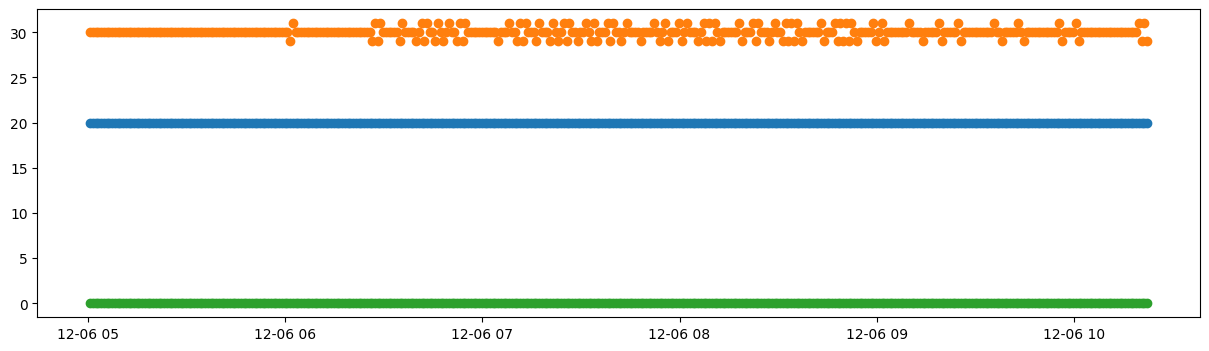

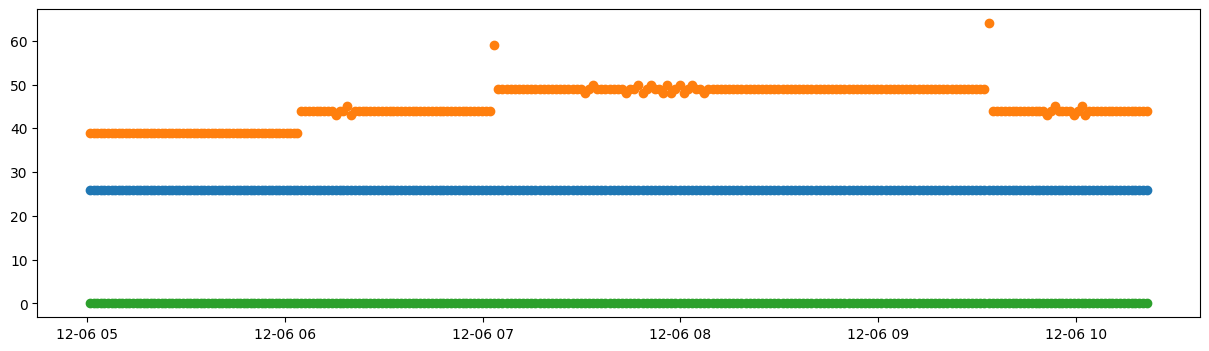

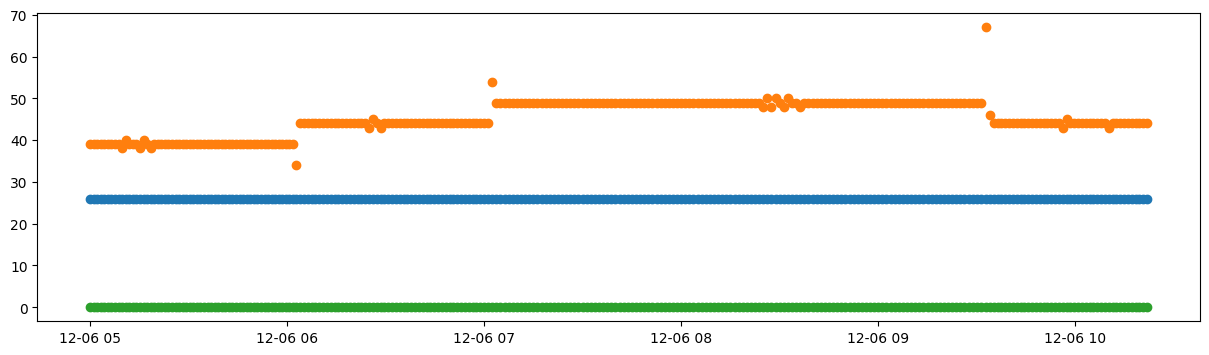

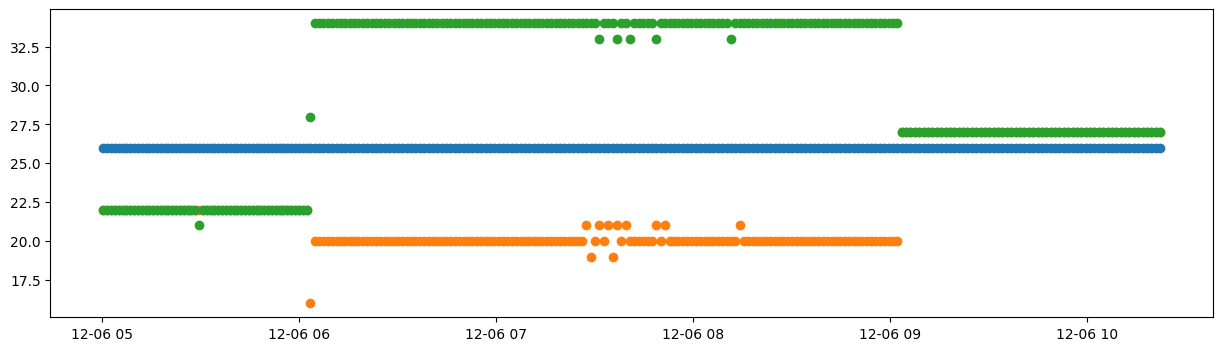

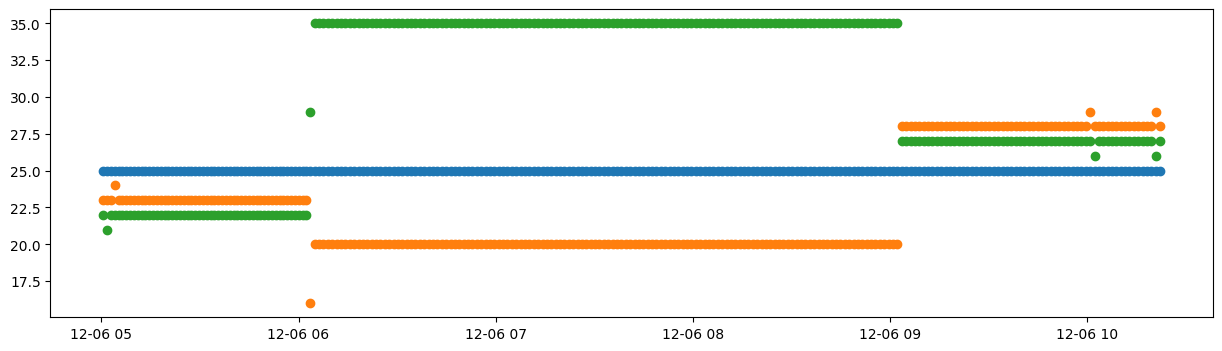

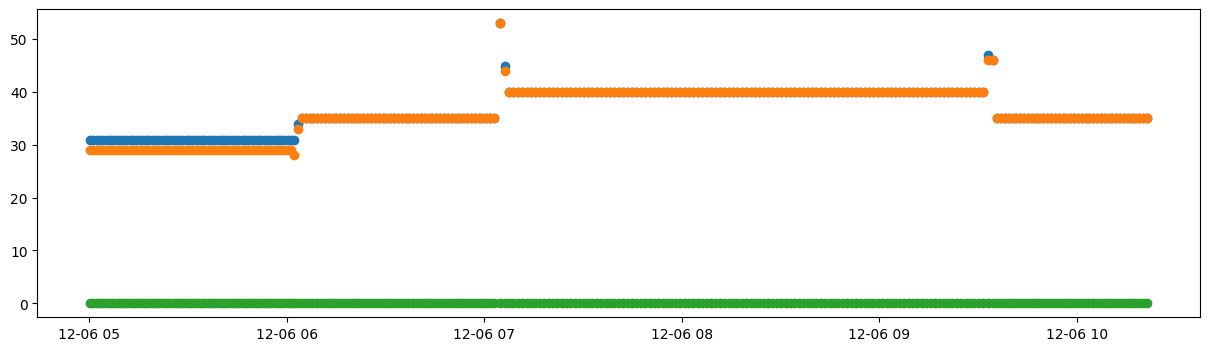

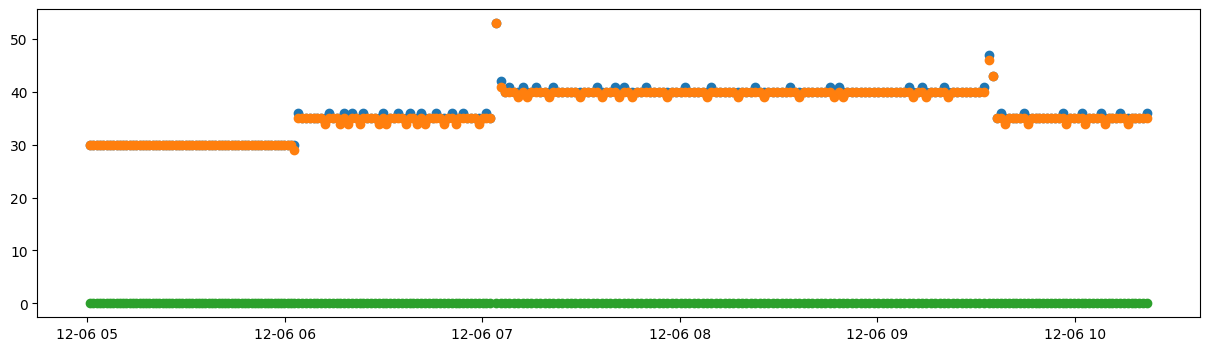

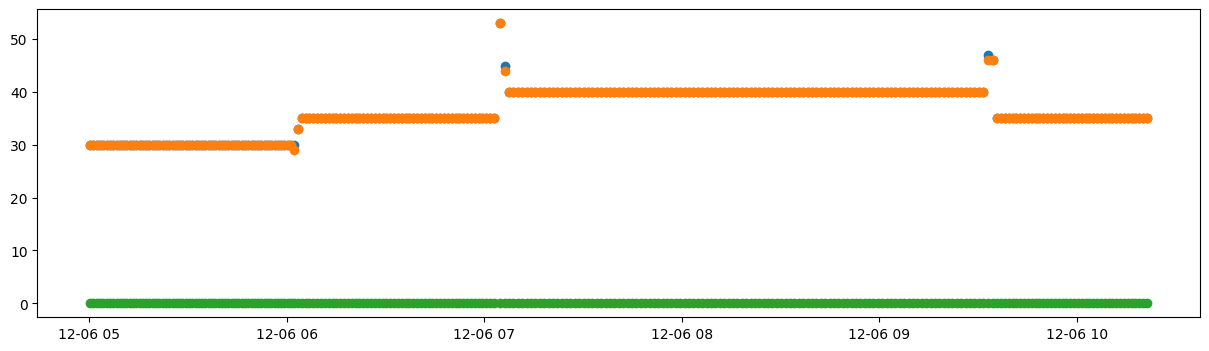

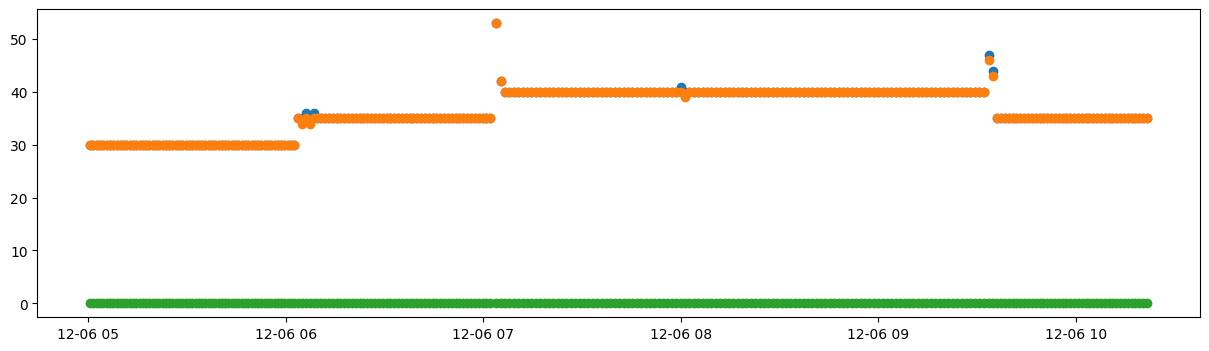

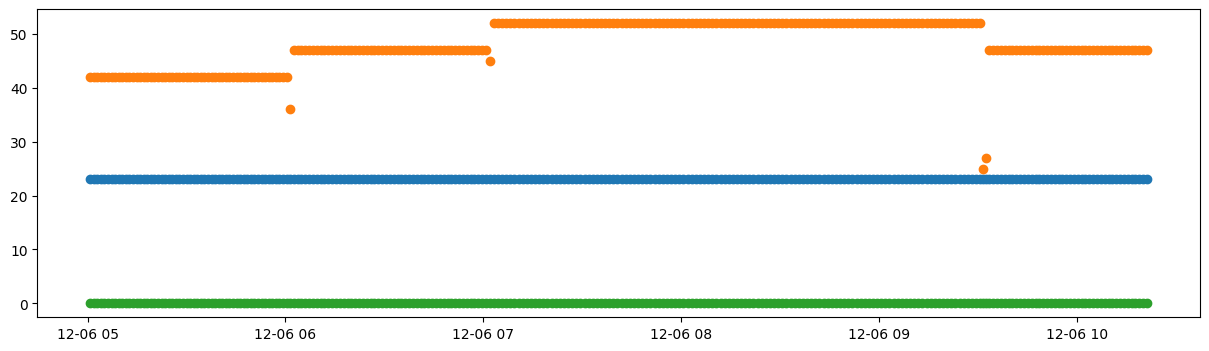

In [21]:
import matplotlib.pyplot as plt
# history1170['date_time'].min()
# history1170['date_time'].max()
for inter_no, history_ in history[history['date_time'] > datetime(2023, 12, 6, 5)].groupby('inter_no'):
    plt.figure(figsize=(15, 4))
    plt.scatter(history_['date_time'], history_['A1_dur'])
    plt.scatter(history_['date_time'], history_['A2_dur'])
    plt.scatter(history_['date_time'], history_['A3_dur'])
# plt.ylim(min_dur,max_dur)
# plt.title(f"split 그래프 (9월 {day}일)")
# plt.gca().xaxis.set_major_formatter(hours_fmt)
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.show()

In [95]:
len(history1170)

def scatter_graphs(day, duration=False, split=True):
    # 날짜 지정 (14 ~ 29)
    day = day
    start_time = datetime(2022, 9, day, 00, 00)
    end_time = datetime(2022, 9, day+1, 00, 00)
    intervals = pd.date_range(start=start_time, end=end_time, freq='30T')
    history_ = history[history['INT_CREATE_DATE'].dt.day==day].copy()
    hours_fmt = mdates.DateFormatter('%H')
    plt.rcParams['font.family'] = 'Malgun Gothic'

    if duration:
        # duration 그래프 (전체)
        plt.figure(figsize=(15, 4))
        plt.scatter(history_['INT_CREATE_DATE'], history_['duration'])
        plt.ylim(min_dur,max_dur)
        plt.title(f"duration 그래프 (9월 {day}일)")
        plt.gca().xaxis.set_major_formatter(hours_fmt)
        plt.gca().xaxis.set_major_locator(mdates.HourLocator())
        plt.show()
    if split:
        # split 그래프 (전체)
        plt.figure(figsize=(15, 4))
        plt.scatter(history_['INT_CREATE_DATE'], history_['INT_SPLIT1'])
        plt.scatter(history_['INT_CREATE_DATE'], history_['INT_SPLIT2'])
        plt.scatter(history_['INT_CREATE_DATE'], history_['INT_SPLIT3'])
        plt.ylim(min_dur,max_dur)
        plt.title(f"split 그래프 (9월 {day}일)")
        plt.gca().xaxis.set_major_formatter(hours_fmt)
        plt.gca().xaxis.set_major_locator(mdates.HourLocator())
        plt.show()

747

In [60]:
stts = pd.read_csv('SOITDSPOTINTSSTTS.csv')
# var = 3600 * 9
# stts['datetime'] = pd.to_datetime(stts['CLCT_UNIX_TM'] + var, unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
# cols = list(stts.columns)
stts['datetime'] = pd.to_datetime(stts['CLCT_UNIX_TM'], unit='s', utc=True)
stts['datetime'] = stts['datetime'].dt.tz_convert('Asia/Seoul').dt.strftime('%Y-%m-%d %H:%M:%S')

cols = list(stts.columns)
cols.remove('datetime')
cols.remove('CLCT_UNIX_TM')
cols.insert(1,'datetime')
stts = stts[cols]
stts

SPOT_INTS_ID             datetime   CLCT_DT  LC_CNT  CTRL_SE_CD  \
0            14638  2023-11-21 16:32:51  20231121       1           0   
1             1001  2023-12-08 15:58:25  20231208      66           0   
2             1002  2023-12-08 15:58:25  20231208      52           0   
3             1003  2023-12-08 15:58:25  20231208      91           0   
...            ...                  ...       ...     ...         ...   
3075          8636  2023-12-08 15:58:25  20231208      34           0   
3076          8635  2023-12-08 15:58:25  20231208     133           0   
3077         11478  2023-12-08 15:58:25  20231208     103           0   
3078         11477  2023-12-08 15:58:25  20231208       0           0   

      CTRL_STTS_CD  SPCN_CTRL_SE_CD  CYCL_HR  OFST_HR  A_RING_1_PHAS_HR  \
0                3                2      140      120                22   
1                1                2      170      150                70   
2                1                2      170      163                32   
3                1                2      170      125                34   
...            ...              ...      ...      ...               ...   
3075             0                2      159        0                 0   
3076             0                2      159       11                 0   
3077             0                2      110       91                20   
3078             3                2        0        0                 0   

      A_RING_2_PHAS_HR  A_RING_3_PHAS_HR  A_RING_4_PHAS_HR  A_RING_5_PHAS_HR  \
0                   48                22                48                 0   
1                   45                55                 0                 0   
2                   31                31                76                 0   
3                   25                33                26                29   
...                ...               ...               ...               ...   
3075                 0                 0                 0                 0   
3076                 0                 0                 0                 0   
3077                35                20                34                 0   
3078                 0                 0                 0                 0   

      A_RING_6_PHAS_HR  A_RING_7_PHAS_HR  A_RING_8_PHAS_HR  B_RING_1_PHAS_HR  \
0                    0                 0                 0                22   
1                    0                 0                 0                70   
2                    0                 0                 0                32   
3                   23                 0                 0                34   
...                ...               ...               ...               ...   
3075                 0                 0                 0                 0   
3076                 0                 0                 0                 0   
3077                 0                 0                 0                20   
3078                 0                 0                 0                 0   

      B_RING_2_PHAS_HR  B_RING_3_PHAS_HR  B_RING_4_PHAS_HR  B_RING_5_PHAS_HR  \
0                   48                22                48                 0   
1                   45                55                 0                 0   
2                   31                76                31                 0   
3                   25                33                26                29   
...                ...               ...               ...               ...   
3075                 0                 0                 0                 0   
3076                 0                 0                 0                 0   
3077                35                20                34                 0   
3078                 0                 0                 0                 0   

      B_RING_6_PHAS_HR  B_RING_7_PHAS_HR  B_RING_8_PHAS_HR  \
0                    0                 0                 0 

In [67]:
stts.SPOT_INTS_ID.unique()
ctrr = pd.read_csv('SOITDSGNLCTRR.csv')
ints_stts = set(stts.SPOT_INTS_ID.unique())
ints_ctrr = set(ctrr.SPOT_INTS_ID.unique())
print(len(ints_stts))
print(len(ints_ctrr))
print(ints_stts - ints_ctrr)
print(ints_ctrr - ints_stts)
print(len(ints_stts - ints_ctrr))
print(len(ints_ctrr - ints_stts))
print(ints_stts.intersection(ints_ctrr))
print(len(ints_stts.intersection(ints_ctrr)))

3079
3024
{9216, 11474, 9220, 11475, 11476, 14222, 9999, 14223, 14224, 14225, 14226, 8596, 11478, 14227, 14228, 8600, 6296, 8608, 8609, 1185, 8612, 8614, 8615, 8616, 18857, 18982, 18983, 18984, 3244, 3245, 3252, 8634, 8635, 8636, 8637, 18885, 18898, 18899, 18900, 11477, 18901, 18902, 18903, 18904, 18905, 18906, 18907, 18908, 18909, 18910, 18911, 18033, 18034, 18035, 18036, 14834, 18038, 18039, 18040, 18041, 18042, 18043, 14835, 9214, 9215}
{9217, 1188, 8581, 9036, 8621, 1165, 2066, 8598, 8599, 14742}
65
10
{8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254, 8143, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264, 8265, 8266, 8267, 8268, 8269, 8270, 8271, 8272, 8

In [72]:
print(sorted(list(stts.A_RING_MVMT_NO.unique())))
print(sorted(list(stts.B_RING_MVMT_NO.unique())))
set(stts.A_RING_MVMT_NO.unique()).union(set(stts.B_RING_MVMT_NO.unique()))

[0, 1, 3, 5, 6, 7, 8, 17, 18]
[0, 1, 2, 3, 4, 10, 17, 18]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 17, 18}

In [57]:
A = ['a','b','c']
A.insert(1,'d')
A.remove('a')
A

['d', 'b', 'c']

In [76]:
soitdtodcnfg = pd.read_csv("soitdtodcnfg.csv")
# soitdintsphasinfo = pd.read_csv("soitdintsphasinfo.csv")
soitdtodcnfg.A_RING_1_PHAS_HR.unique()
soitdintsphasinfo = pd.read_csv("soitdintsphasinfo.csv")
SOITSINTSSGNLCNFGINFO

array([  0,  40,  35,  63,  70,  39,  31,  34,  32,  16, 135, 145, 150,
       140, 130,  38,  36,  37,  50,  55,  45,  44,  48,  52,  54,  51,
        42,  27,  29,  25,  21,  22,  23,  28,  90,  92,  79,  75,  71,
        83,  87,  91,  59,  30,  20,  19,  33,  17,  15,  43,  41,  18,
        26,  24], dtype=int64)